# Analysis of tweets regarding COVID-19 in Kenyan Twitter

This project aims to investigate the nature of online discourse on Kenyan twitter regarding the COVID-19 pandemic.
Kenyan twittersphere is remrkably fluid, with moments of online solidarity as frequent as moments of extreme polarisation.
This project seeks to understand whether conversations about COVID-19 have been tainted by the usual propaganda common in Kenyan twittersphere, or 'tweeps' have been level headed in their discourse.

This is an ongoing project, and in future, I intend to use Sentiment Analysis, Word Embedding and Topic Modeling for further analysis on this dataset.


The major challenge to further analysis using NLP is the languages Kenyans use on Twitter. 
While its mostly common for Kenyans to use English on social media,they will also use Swahili and Sheng'(Swahili slang) regulary. 
Add that to the fact that some Kenyans may tweet in any of the 43 ethnic languages spoken in the country (Mostly the 6 most populous languages/ethnic groups, Kikuyu, Luhya, Kalenjin, Luo, Kamba, Somali), and this task quickly snowballs into an almost impossible task.

It is my hope that in the future, more research will be done on African languages to develop resources such as stoplists and dictionaries, as almost all the research in NLP is currently on Indo-European and Sino-Tibetan languages.

In this task, we use the python library GetOldTweets3 to query for tweets.

In [ ]:
#Neccessary imports

import numpy as np
import GetOldTweets3 as got
import re
import pandas as pd 
import pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
#import pyarrow.feather as feather
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 10)

To narrow the scope of this project, and to ensure most of the tweets were by Kenyans, I decided to use four hashtags that had been trending on Kenyan Twitter since the first news of the pandemic broke.

This will decrease the number of tweets available, since some people wont be using these hashtags, but it will keep the dataset clean, with only Kenyan tweets present.

An option would have been to use geolocation as a search term, but as will be discovered later, this is not a viable option for Kenyan Twitter.


In [ ]:
search_terms = ['#covid19kenya','#coronavirusinKenya','#covid19inkenya','#covid_19ke']
#search_terms = ['covid19kenya','coronavirusinKenya','covid19inkenya','covid_19ke']

This search was done on 21st March 2020 at 1634 hrs (East African Time)

In [ ]:
## scrape data from twitter for the above search terms

tweet_df_all = pd.DataFrame()
for term in search_terms:
    print(term)
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(term)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    tweet_list = [[tweet[x].id,
                  tweet[x].username, 
                  tweet[x].text,
                  tweet[x].retweets,
                  tweet[x].permalink,
                  tweet[x].date,
                  tweet[x].favorites,
                  tweet[x].mentions,
                  tweet[x].hashtags,
                  tweet[x].geo,
                  tweet[x].urls
                 ]for x in range(0, len(tweet))]
    tweet_df = pd.DataFrame(tweet_list)
    tweet_df['search_term'] = term
    tweet_df_all = tweet_df_all.append(tweet_df)

tweet_df_all.columns = ['id','username ','text','retweets','permalink','date','favorites','mentions','hashtags','geo','urls', 'search_term']
tweet_df_all.to_csv('data/covid19_kenya_tweets_21Mar_1634.csv', index=False)


In [2]:
#Load dataframe from the generated csv file
tweet_df = pd.read_csv("data/covid19_kenya_tweets_21Mar_1634.csv")

In [3]:
tweet_df.head()

,id,username,text,retweets,permalink,date,favorites,mentions,hashtags,geo,urls,search_term
0,1241357622378455043,tollytolla,juu leo ni weekend na Hakuna Game Si utafte mt...,0,https://twitter.com/tollytolla/status/12413576...,2020-03-21 13:34:55+00:00,0,NaN,#KOTPrayerDay #KunijengaKE #Covid19kenya,NaN,NaN,#covid19kenya
1,1241356837536043008,ones_mc,Coronavirus has also reminded my friends that ...,0,https://twitter.com/ones_mc/status/12413568375...,2020-03-21 13:31:48+00:00,0,NaN,#covid19kenya,NaN,NaN,#covid19kenya
2,1241356384417067009,nosimkad,Why paycut they should get nothing at all they...,1,https://twitter.com/nosimkad/status/1241356384...,2020-03-21 13:29:59+00:00,1,NaN,#coronavirusinKenya #covid19kenya,NaN,NaN,#covid19kenya
3,1241356233086566400,Ramadhan1000000,#Covid_19 is so islamic dat #worldwide #WorldP...,0,https://twitter.com/Ramadhan1000000/status/124...,2020-03-21 13:29:23+00:00,0,NaN,#Covid_19 #worldwide #WorldPoetryDay #StayAtHo...,NaN,NaN,#covid19kenya
4,1241355668789104641,irunguhoughton,Two unverified posts (please do not arrest me)...,0,https://twitter.com/irunguhoughton/status/1241...,2020-03-21 13:27:09+00:00,1,NaN,#KomeshaCorona #Covid19kenya #CoronaVirusUpdat...,NaN,NaN,#covid19kenya


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52430 entries, 0 to 52429
Data columns (total 12 columns):
id             52430 non-null int64
username       52430 non-null object
text           52430 non-null object
retweets       52430 non-null int64
permalink      52430 non-null object
date           52430 non-null object
favorites      52430 non-null int64
mentions       7749 non-null object
hashtags       52427 non-null object
geo            0 non-null float64
urls           9845 non-null object
search_term    52430 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


We have 52430 tweets! 

An interesting finding is none of the tweets have tagged GeoLocation. 
As alluded to earlier, it seems Kenyans do not like geo tagging their tweets.

In [5]:
#Drop columns which add limited value to our analysis
cols_to_drop = ['id','permalink', 'geo']
tweet_df = tweet_df.drop(cols_to_drop, axis=1)

In [6]:
#Check for duplicates
tweet_df.duplicated().sum()

0

In [7]:
#Find tweeps regulary tweeting about COVID-19
tweet_df['username '].value_counts()

Tuko_co_ke       159
HeyKOT1          154
YWFkenya         106
COVID19Kenya      96
dailynation       81
                ... 
KaptenMwendwa      1
crazydenno         1
TatuBila           1
kolloh_dj          1
black0toyo         1
Name: username , Length: 23563, dtype: int64

A pictorial representation of tweeps regulary tweeting about COVID-19

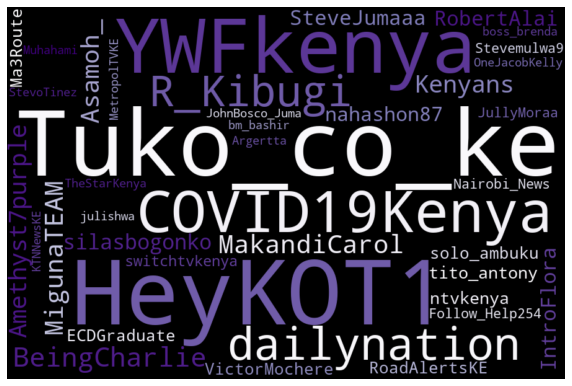

In [8]:
#regular tweeters
from wordcloud import WordCloud
tweeps = tweet_df['username '].dropna(False)
plt.subplots(figsize=(10,10))
#wordcloud = WordCloud(background_color = 'white',
                     #width = 512,
                    # height = 384).generate(' '.join(cities))
wordcloud = WordCloud(max_words=40, width = 900, height=600, colormap='Purples', 
                      background_color="black", random_state=79).generate(' '.join(tweeps))

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('data/tweeps.png')
#plt.imsave(arr = wordcloud, fname = 'wordcloud.png')
plt.show()

Notable Kenyan tweeps such as @RobertAlai, @julishwa and @Asamoh_ make an appearance.
In addition, media pages such as @dailynation, @Ma3Route, @Nairobi_News, @Tuko_co_ke and @KTNNewsKE are also among the most the regular "tweeters".

However, there are a number of accounts in the image above that maybe bots or suspicious/propaganda accounts.(Due to a high number of tweets on this topic but no visibility in normal Kenyan Twitter discourse)



There is a glaring absence of KOT(Kenyans on Twitter) bigwigs and influencers accounts above. 
Maybe they are too busy running marketing campaigns?

In [9]:
from nltk import FreqDist, word_tokenize

*****
I decided to use English stopwords for this analysis, and add some common words in the dataset to derive reasonable conclusions.

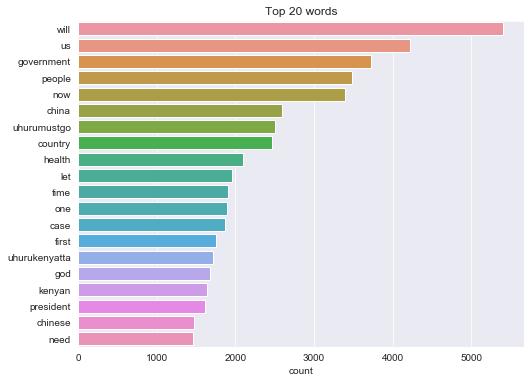

In [10]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
more_stopwords = {'kenya', 'coronavirusinkenya', 'na', 'https', 'corona', 'coronavirus',
                 'virus', 'coronavirusupdates', 'coronaviruspandemic', 'coronainkenya', 'coronaoutbreak',
                 'coronavirusupdate', 'coronaviruskenya','kenyans'}
stopwords = stopwords.union(more_stopwords)


# Unigrams
word_freq = FreqDist(w for w in word_tokenize(' '.join(tweet_df['text']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(top20w['count'], top20w.index)
plt.title('Top 20 words')
plt.show()

The president's name seems to be a pretty common in these tweets. Also words related to China, Health and God appear regulary.

To derive more meaning, lets look at distribution of two-word phrases.

Text(0.5, 1.0, 'Top bigrams in Kenyan COVID19 tweets')

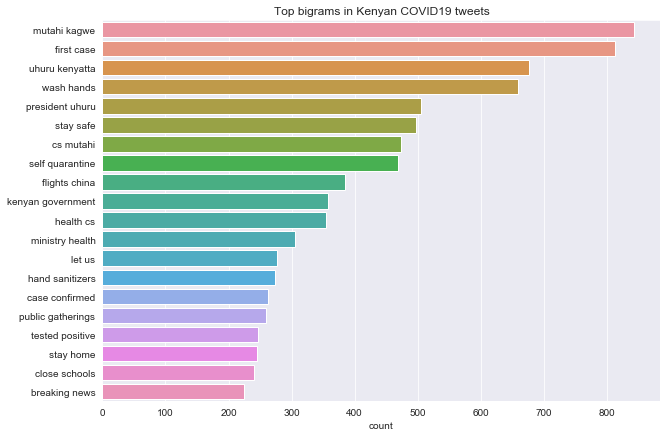

In [11]:
# Bigrams

from nltk import bigrams
stopwords = set(STOPWORDS)
more_stopwords = {'kenya', 'coronavirusinkenya', 'na', 'https', 'corona', 'coronavirus',
                 'virus', 'coronavirusupdates', 'coronaviruspandemic', 'coronainkenya', 'coronaoutbreak',
                 'coronavirusupdate', 'coronaviruskenya','kenyans', 'amp'}
stopwords = stopwords.union(more_stopwords)
plt.figure(figsize=(10,7))

bigram_d = list(bigrams([w for w in word_tokenize(' '.join(tweet_df['text']).lower())if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20])
plt.title('Top bigrams in Kenyan COVID19 tweets')

This becomes more interesting. Common phrases include that of Health Cabinet Mutahi Kagwe (who was carrying out daily briefs on COVID-19), President Uhuru, hand sanitizers, self quarantine and stay home.

We can conclude that Kenyans were mainly tweeting informational tweets about COVID-19.

Next, lets look at distribution of three-word phrases.

Text(0.5, 1.0, 'Top trigrams')

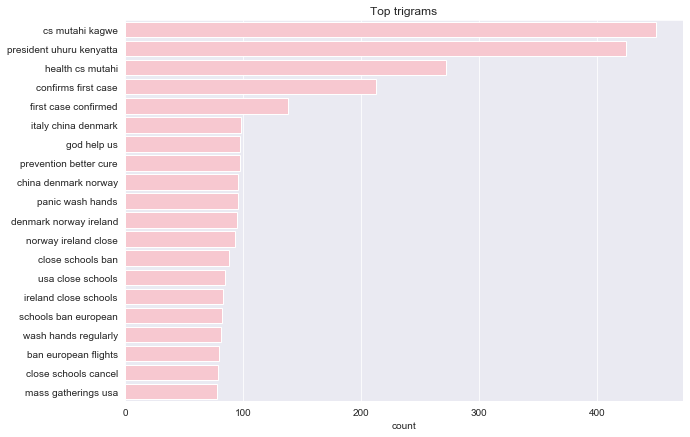

In [12]:
# Trigrams

from nltk import trigrams
stopwords = set(STOPWORDS)
more_stopwords = {'kenya', 'coronavirusinkenya', 'na', 'https', 'corona', 'coronavirus',
                 'virus', 'coronavirusupdates', 'coronaviruspandemic', 'coronainkenya', 'coronaoutbreak',
                 'coronavirusupdate', 'coronaviruskenya','kenyans', 'amp','lockdown'}
stopwords = stopwords.union(more_stopwords)
plt.figure(figsize=(10,7))

bigram_d = list(trigrams([w for w in word_tokenize(' '.join(tweet_df['text']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20], color='pink')
plt.title('Top trigrams')

Again, the President and the Health CS feature prominently, but we have more interesting observations. 
The phrase "first case confirmed" appears. This may be in relation of the confirmation of the first COVID-19 case in Kenya on March 12th.

An even more interesting finding is the appearance of phrases such as "ban european flights" and appearance of countries such as Denmark, Norway, USA, Italy and Ireland in the phrases. This shows that Kenyans are very informed on international events with regards to COVID-19.

In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52430 entries, 0 to 52429
Data columns (total 9 columns):
username       52430 non-null object
text           52430 non-null object
retweets       52430 non-null int64
date           52430 non-null object
favorites      52430 non-null int64
mentions       7749 non-null object
hashtags       52427 non-null object
urls           9845 non-null object
search_term    52430 non-null object
dtypes: int64(2), object(7)
memory usage: 3.6+ MB


Time series Analysis

In [14]:
# overwriting data after changing format 

#tweet_df['date'] = tweet_df['date'].tz_localize('UTC')
tweet_df['date']=pd.to_datetime(tweet_df['date']).dt.tz_convert('Africa/Nairobi')
tweet_df["date"]= pd.to_datetime(tweet_df["date"]) 
tweet_df['tweet_time'] = tweet_df['date'].dt.time
tweet_df['tweet_date'] = tweet_df['date'].dt.date


In [15]:
tweet_df.head()

,username,text,retweets,date,favorites,mentions,hashtags,urls,search_term,tweet_time,tweet_date
0,tollytolla,juu leo ni weekend na Hakuna Game Si utafte mt...,0,2020-03-21 16:34:55+03:00,0,NaN,#KOTPrayerDay #KunijengaKE #Covid19kenya,NaN,#covid19kenya,16:34:55,2020-03-21
1,ones_mc,Coronavirus has also reminded my friends that ...,0,2020-03-21 16:31:48+03:00,0,NaN,#covid19kenya,NaN,#covid19kenya,16:31:48,2020-03-21
2,nosimkad,Why paycut they should get nothing at all they...,1,2020-03-21 16:29:59+03:00,1,NaN,#coronavirusinKenya #covid19kenya,NaN,#covid19kenya,16:29:59,2020-03-21
3,Ramadhan1000000,#Covid_19 is so islamic dat #worldwide #WorldP...,0,2020-03-21 16:29:23+03:00,0,NaN,#Covid_19 #worldwide #WorldPoetryDay #StayAtHo...,NaN,#covid19kenya,16:29:23,2020-03-21
4,irunguhoughton,Two unverified posts (please do not arrest me)...,0,2020-03-21 16:27:09+03:00,1,NaN,#KomeshaCorona #Covid19kenya #CoronaVirusUpdat...,NaN,#covid19kenya,16:27:09,2020-03-21


This is work in progress.

To be continued......